In [1]:
from src.graph import *
from src.mdp import *
from src.policy import *
from src.nyc import *

import matplotlib.pyplot as plt
import numpy as np

/Users/fabiopruneri/Documents/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
# Simulating the MDP over a finite number of steps
#  for a given policy (approximate policy evaluation)

mdp = MDP['small']

##### policy_random

In [5]:
# Pick a taxi driver at random, including those that might
#  be far away or already completing a query
mdp.eval(policy_random, no_iter=10000, verbose_result=True)

Total reward over 10000 steps:  -22328
Approx 223.3  pct of avg trip time


-22328

##### policy_earliest_free

In [6]:
# Pick a random taxi driver which is free
#  (or has the least time remaning before completing current ride)
mdp.eval(policy_earliest_free, no_iter=10000, verbose_result=True)

Total reward over 10000 steps:  -10185
Approx 101.8  pct of avg trip time


-10185

##### policy_greedy

In [5]:
# Greedy policy: pick taxi driver that minimizes immediate cost,
#  so minimizes distance from start point + time to complete current query (if busy)
mdp.eval(policy_greedy(mdp), no_iter=10000, verbose_result=True)

Total reward over 10000 steps:  -5875
Approx 58.8  pct of avg trip time


-5875

# Table of results for all graphs

In [2]:
# Results are in percentage of average trip time
# So a value of 20 would mean the customer waits on average 20% of the length of the trip

In [11]:
# Takes 1 minute to run
baselines = {}
for name, mdp in MDP.items():
    print("MDP ", name)
    baselines[name] = {'random': mdp.eval(policy_random, no_iter=100000, return_pct_trip=True),
                       'earliest': mdp.eval(policy_earliest_free, no_iter=100000, return_pct_trip=True),
                       'greedy': mdp.eval(policy_greedy(mdp), no_iter=100000, return_pct_trip=True)}
    print("   policy_random:       ", round(mdp.eval(policy_random, no_iter=100000, return_pct_trip=True)))
    print("   policy_earliest_free:", round(mdp.eval(policy_earliest_free, no_iter=100000, return_pct_trip=True)))
    print("   policy_greedy:       ", round(mdp.eval(policy_greedy(mdp), no_iter=100000, return_pct_trip=True)))
    print("\n")

MDP  small
   policy_random:        225
   policy_earliest_free: 102
   policy_greedy:        60


MDP  medium
   policy_random:        192
   policy_earliest_free: 100
   policy_greedy:        61


MDP  large
   policy_random:        168
   policy_earliest_free: 100
   policy_greedy:        60


MDP  line
   policy_random:        83618
   policy_earliest_free: 81003
   policy_greedy:        49


MDP  complete
   policy_random:        157
   policy_earliest_free: 100
   policy_greedy:        85


MDP  nyc
   policy_random:        120
   policy_earliest_free: 71
   policy_greedy:        45




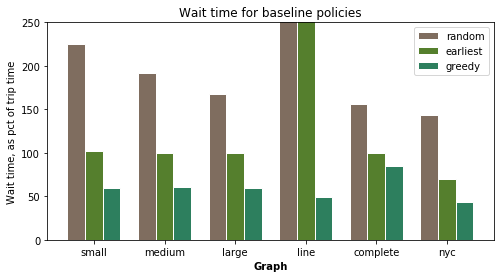

<Figure size 432x288 with 0 Axes>

In [18]:
#https://python-graph-gallery.com/11-grouped-barplot/
# set width of bar
plt.figure(figsize=(8, 4))
barWidth = 0.25
 
# set height of bar
bars1 = [baselines[key]['random'] for key in MDP.keys()]
bars2 = [baselines[key]['earliest'] for key in MDP.keys()]
bars3 = [baselines[key]['greedy'] for key in MDP.keys()]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='random')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='earliest')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='greedy')
 
# Add xticks on the middle of the group bars
plt.title("Wait time for baseline policies")
plt.xlabel('Graph', fontweight='bold')
plt.ylabel("Wait time, as pct of trip time")
plt.xticks([r + barWidth for r in range(len(bars1))], MDP.keys())
plt.ylim((0, 250))
 
# Create legend & Show graphic
plt.legend()
plt.show()
plt.savefig("img/baselines.png")

In [12]:
baselines

{'small': {'random': 225.605, 'earliest': 101.877, 'greedy': 59.988},
 'medium': {'random': 191.54177215189875,
  'earliest': 99.91518987341773,
  'greedy': 61.20569620253164},
 'large': {'random': 167.3963208003873,
  'earliest': 100.19969340003227,
  'greedy': 59.95118605776989},
 'line': {'random': 77635.43714285715,
  'earliest': 83798.26105263157,
  'greedy': 49.11383458646617},
 'complete': {'random': 156.27368421052634,
  'earliest': 100.03368421052632,
  'greedy': 85.28526315789475},
 'nyc': {'random': 143.30087355396842,
  'earliest': 69.76467397646111,
  'greedy': 42.952375817322206}}

# Different number of drivers for nyc

In [15]:
MDP['nyc'].K # Default value

13

In [7]:
Ks = list(range(7, 31))
wait_times = {}

for k in Ks:
    mdp = MarkowDP(G['nyc'], K=k, queries=nyc_queries)
    wait_times[k] = {'random': mdp.eval(policy_random, no_iter=10000, return_pct_trip=True),
                     'earliest': mdp.eval(policy_earliest_free, no_iter=10000, return_pct_trip=True),
                     'greedy': mdp.eval(policy_greedy(mdp), no_iter=10000, return_pct_trip=True)}

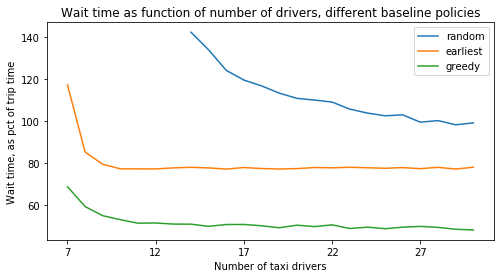

In [10]:
plt.figure(figsize=(8, 4))

print_K = {'random': list(range(14, 31)),
           'earliest': list(range(7, 31)),
           'greedy': list(range(7, 31))}
for policy in ['random', 'earliest', 'greedy']:
    plt.plot(print_K[policy], [wait_times[k][policy] for k in print_K[policy]], label=policy)
    
plt.xticks(print_K['greedy'][::5], [str(k) for k in print_K['greedy'][::5]])
plt.title("Wait time as function of number of drivers, different baseline policies")
plt.xlabel("Number of taxi drivers")
plt.ylabel("Wait time, as pct of trip time")
plt.legend()

plt.savefig("img/baselines_vs_K.png")